In [1]:
!pip install pandas numpy matplotlib seaborn openpyxl



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

print("Numpy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)


Numpy: 2.3.5
Pandas: 2.2.3
Matplotlib: 3.10.7
Seaborn: 0.13.2


In [3]:
df = pd.read_excel("Employee Data.xlsx")
df.head()


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,1969-10-07,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11,NaT,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,1965-08-30,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10,NaT,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,1991-10-06,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,1998-04-04,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29,NaT,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,1969-08-29,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
df = pd.read_excel("Employee Data.xlsx" )
print("Loaded dataframe shape:", df.shape)
display(df.head())


Loaded dataframe shape: (3000, 26)


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,1969-10-07,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11,NaT,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,1965-08-30,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10,NaT,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,1991-10-06,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,1998-04-04,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29,NaT,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,1969-08-29,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [5]:
# normalize column names & helper utils
df.columns = [c.strip() for c in df.columns]
lowermap = {c.lower(): c for c in df.columns}

def get_col(*variants):
    for v in variants:
        if v.lower() in lowermap:
            return lowermap[v.lower()]
    return None

cols = {
    'emp_id': get_col('EmployeeID','EmpID','ID'),
    'hire_date': get_col('HireDate','DateOfHire','Hire Date', 'StartDate'),
    'term_date': get_col('TerminationDate','ExitDate','DateOfTermination','LastWorkingDate'),
    'term_type': get_col('TerminationType','Termination Reason','Exit Type'),
    'term_reason': get_col('ExitReason','ReasonForLeaving','TerminationReason', 'TerminationDescription'),
    'gender': get_col('Gender','Sex', 'GenderCode'),
    'age': get_col('Age'),
    'dept': get_col('Department','Dept', 'DepartmentType'),
    'biz_unit': get_col('BusinessUnit','Business Unit'),
    'jobtitle': get_col('JobTitle','Title'),
    'class': get_col('EmployeeClassification','EmploymentType','Classification', 'EmployeeClassificationType'),
    'perf': get_col('PerformanceScore','Performance Rating','Rating', 'Performance Score'),
    'payzone': get_col('PayZone','Pay Zone'),
    'supervisor': get_col('SupervisorID','ManagerID','Supervisor'),
    'tenure': get_col('Tenure','LengthOfService')
}
print("Detected columns mapping (None means not found):")
for k,v in cols.items():
    print(f"{k:10} -> {v}")


Detected columns mapping (None means not found):
emp_id     -> EmpID
hire_date  -> StartDate
term_date  -> ExitDate
term_type  -> TerminationType
term_reason -> TerminationDescription
gender     -> GenderCode
age        -> None
dept       -> DepartmentType
biz_unit   -> BusinessUnit
jobtitle   -> Title
class      -> EmployeeClassificationType
perf       -> Performance Score
payzone    -> PayZone
supervisor -> Supervisor
tenure     -> None


In [6]:
# Cell 3 - compute tenure
if cols['hire_date']:
    df[cols['hire_date']] = pd.to_datetime(df[cols['hire_date']], errors='coerce')
if cols['term_date']:
    df[cols['term_date']] = pd.to_datetime(df[cols['term_date']], errors='coerce')

today = pd.Timestamp.now()

# Create tenure_years column if not present
if cols['tenure'] and cols['tenure'] in df.columns:
    df['tenure_years'] = pd.to_numeric(df[cols['tenure']], errors='coerce')
else:
    if cols['hire_date']:
        # If TerminationDate exists, tenure = TerminationDate - HireDate else today - HireDate
        df['tenure_days'] = (df[cols['term_date']].fillna(today) - df[cols['hire_date']]).dt.days
        df['tenure_years'] = (df['tenure_days'] / 365.25).round(2)
    else:
        df['tenure_years'] = np.nan

print("Tenure computed. Tenure column sample:")
display(df[['tenure_years']].describe())


Tenure computed. Tenure column sample:


,tenure_years
count,3000.000000
mean,3.023590
std,2.152355
min,0.000000
25%,1.050000
50%,2.830000
75%,4.740000
max,7.310000


In [7]:
# Cell 4 - data quality
print("Basic info:")
display(df.info())

print("\nMissing value counts (top cols):")
display(df.isna().sum().sort_values(ascending=False).head(20))


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    1533 non-null   datetime64[ns]
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null   object        
 11  PayZone                     3000 non-null   

None


Missing value counts (top cols):


ExitDate                      1467
TerminationDescription        1467
LastName                         0
EmpID                            0
StartDate                        0
Title                            0
Supervisor                       0
ADEmail                          0
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
FirstName                        0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
dtype: int64

In [8]:
# --- Robust Cell 5: Attrition / exits overview (replacement) ---
import numpy as np

# helper: safe get termination date col name (may be None)
term_col = cols.get('term_date')
status_col = get_col('Status','EmployeeStatus','IsActive')

# 1) If a status column exists, try to convert it to a boolean 'exited' flag.
if status_col and status_col in df.columns:
    s = df[status_col].dropna()
    print(f"Detected status column: {status_col} (sample values: {s.unique()[:10]})")
    # common mappings for object/string columns
    if df[status_col].dtype == object:
        # lowercase strings for matching
        s_low = df[status_col].astype(str).str.lower().str.strip()
        exited_mask = s_low.isin([
            'terminated','inactive','exited','left','left company','resigned',
            'resignation','yes','y','no longer with company','separated'
        ])
        # also consider values that indicate still active
        still_mask = s_low.isin(['active','current','working','yes_active','y_active','onboarded','present'])
        # prefer explicit exited indicators, else fallback to term_date
        df['exited'] = exited_mask.fillna(False)
        # if nothing flagged as exited and termination date exists, fallback below will override missing ones
    elif pd.api.types.is_bool_dtype(df[status_col]):
        df['exited'] = df[status_col].astype(bool)
    elif pd.api.types.is_numeric_dtype(df[status_col]):
        # numeric: treat 1 as exited/left, 0 as active (common in HR datasets)
        df['exited'] = df[status_col].fillna(0).astype(int).isin([1])
    else:
        # unknown dtype: create empty column to avoid KeyError, fallback to term_date next
        df['exited'] = False
else:
    print("No status column detected; will derive 'exited' from TerminationDate (if available).")
    df['exited'] = False

# 2) If TerminationDate exists, use it to mark exits (this will mark missed ones too)
if term_col and term_col in df.columns:
    df[term_col] = pd.to_datetime(df[term_col], errors='coerce')
    df['exited'] = df['exited'] | (~df[term_col].isna())

# 3) As a final guard: if exited is all False and you expect some exits, print a hint
if df['exited'].sum() == 0:
    print("Warning: 'exited' column has zero True values. If you expected exits, check your Status/Termination columns.")
else:
    print(f"Total exits detected: {df['exited'].sum()} (rate = {df['exited'].mean()*100:.2f}%)")

# 4) Show top exit reasons if present
if cols.get('term_reason') and cols['term_reason'] in df.columns:
    reasons = df[cols['term_reason']].fillna('Unknown').value_counts().head(10)
    print("\nTop exit reasons:")
    display(reasons)
else:
    print("No exit reason column detected.")


Detected status column: EmployeeStatus (sample values: ['Active' 'Future Start' 'Voluntarily Terminated' 'Leave of Absence'
 'Terminated for Cause'])
Total exits detected: 1533 (rate = 51.10%)

Top exit reasons:


TerminationDescription
Unknown                                     1467
Me see picture nature degree benefit.          1
Blue community type skill story.               1
Summer personal bag.                           1
Alone once than. More condition pay far.       1
Foot in theory minute recognize test.          1
Degree wish science when thing week old.       1
Fear particular method stage.                  1
Wall body wonder successful.                   1
Visit foot nearly radio treatment.             1
Name: count, dtype: int64

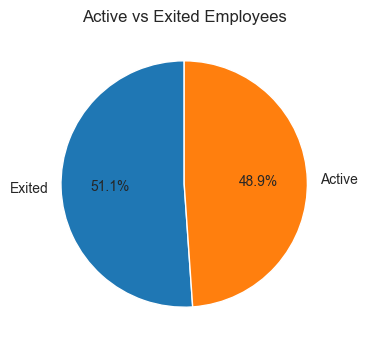

In [9]:
# Pie chart for exited vs active
sns.set_style("whitegrid")
counts = df['exited'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(counts, labels=['Active' if not x else 'Exited' for x in counts.index], autopct='%1.1f%%', startangle=90)
plt.title('Active vs Exited Employees')
plt.show()



Turnover rate by DepartmentType:


DepartmentType
Executive Office        79.166667
Admin Offices           60.000000
Software Engineering    55.652174
IT/IS                   52.093023
Production              50.198020
Sales                   49.546828
dtype: float64

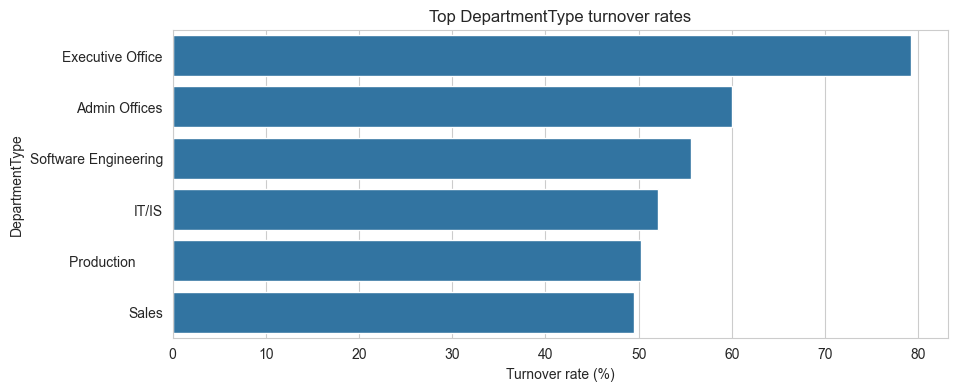


Turnover rate by Title:


Title
Data Architect                  100.000000
Enterprise Architect             80.000000
Software Engineering Manager     70.000000
Senior BI Developer              66.666667
BI Developer                     65.909091
Data Analyst                     62.500000
Network Engineer                 61.818182
Accountant I                     60.606061
Sr. Network Engineer             56.000000
Shared Services Manager          55.000000
President & CEO                  54.545455
Production Manager               54.545455
IT Manager - Infra               54.545455
IT Manager - DB                  54.545455
CIO                              54.545455
dtype: float64

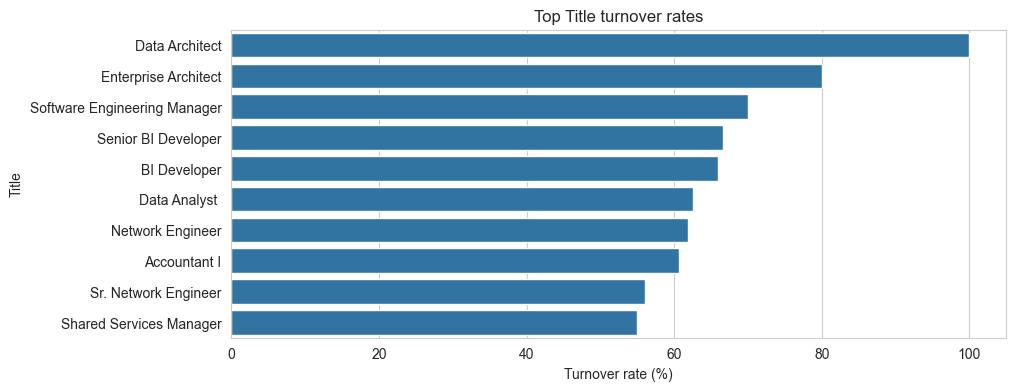


Turnover rate by PayZone:


PayZone
Zone B    52.690355
Zone A    50.470810
Zone C    50.157398
dtype: float64

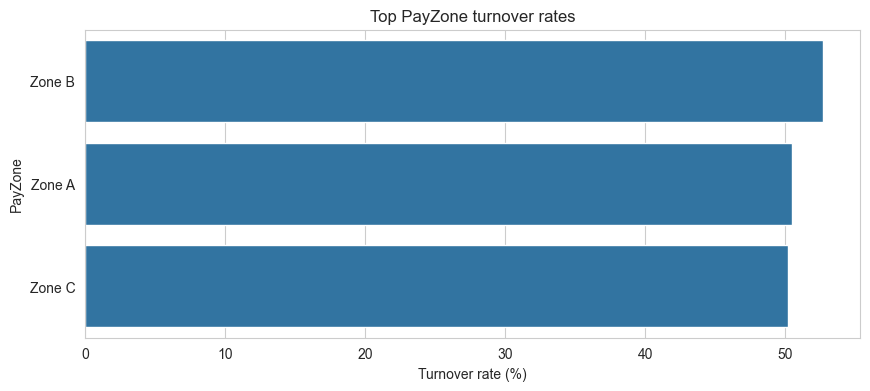


Turnover rate by BusinessUnit:


BusinessUnit
SVG     54.934211
WBL     53.061224
MSC     53.040541
PYZ     52.508361
EW      50.993377
NEL     50.657895
TNS     50.505051
BPC     49.504950
CCDR    48.333333
PL      47.508306
dtype: float64

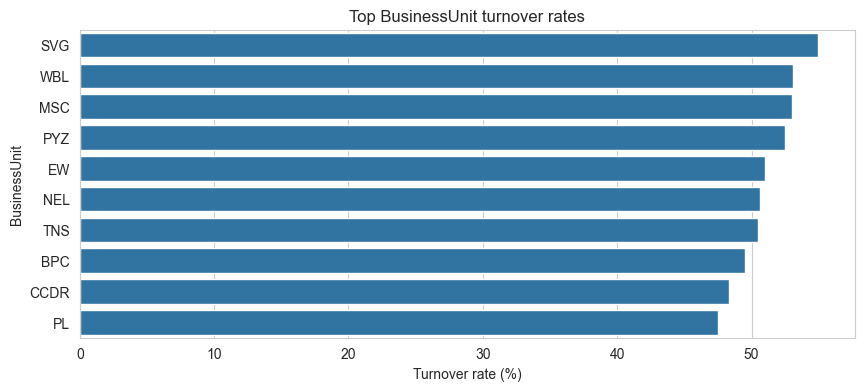

In [10]:
# Cell 6 - turnover rates by department, jobtitle, payzone
def turnover_rate(group):
    return (group['exited'].sum() / len(group)) * 100

for col_label in ['dept','jobtitle','payzone','biz_unit']:
    col = cols.get(col_label)
    if col:
        print(f"\nTurnover rate by {col}:")
        tr = df.groupby(col).apply(turnover_rate).sort_values(ascending=False).head(15)
        display(tr)
        # Barplot top 10
        plt.figure(figsize=(10,4))
        sns.barplot(x=tr.head(10).values, y=tr.head(10).index)
        plt.xlabel('Turnover rate (%)')
        plt.title(f'Top {col} turnover rates')
        plt.show()


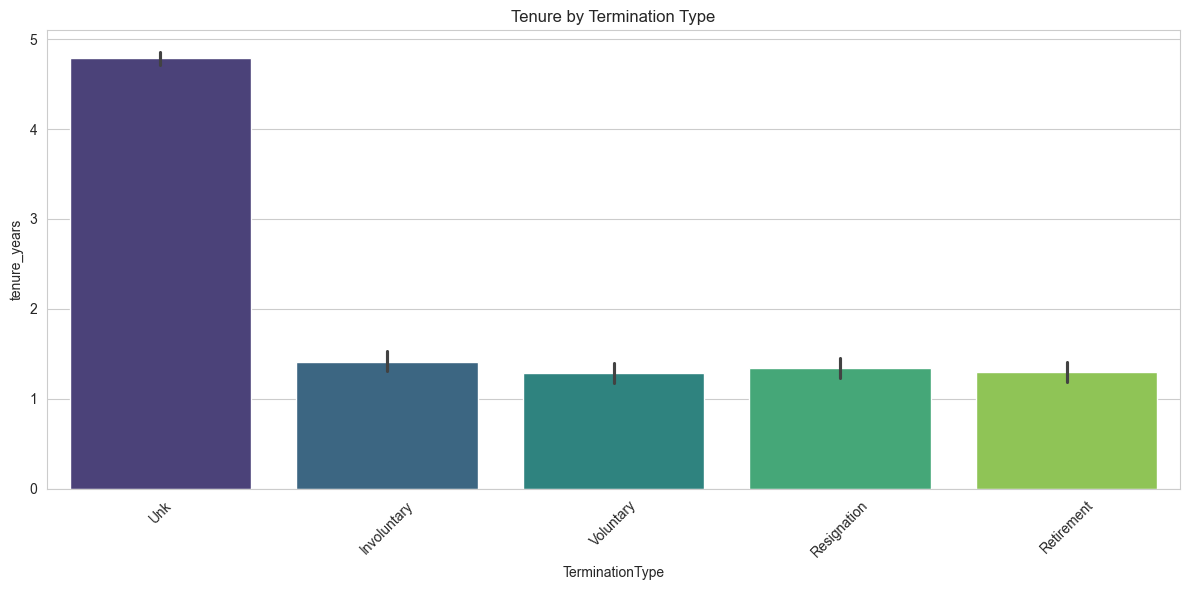

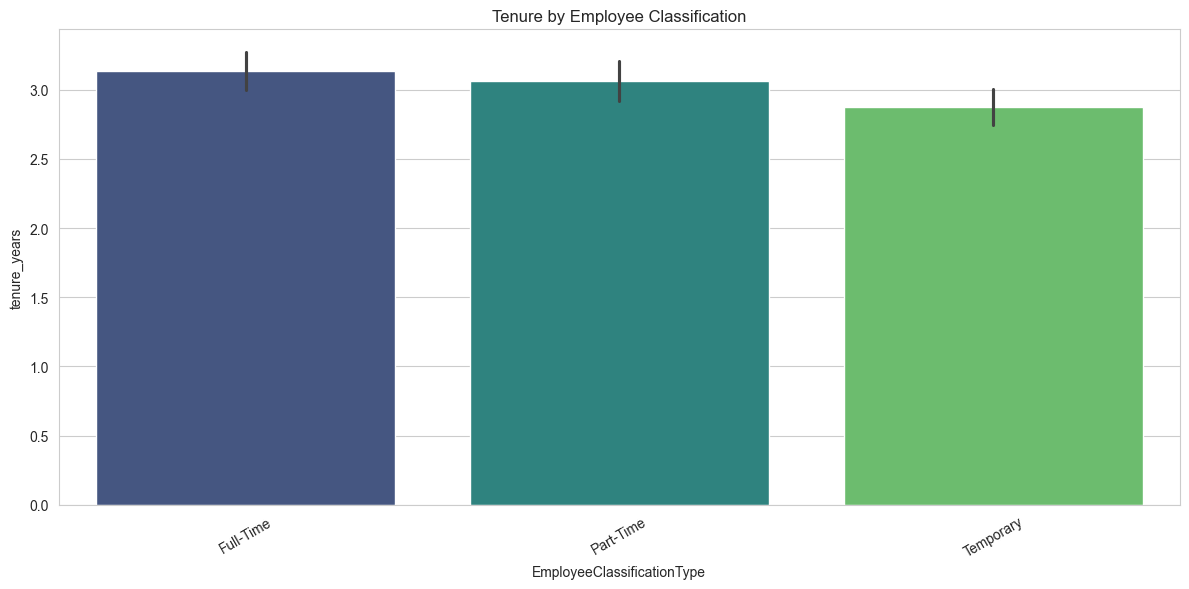

In [11]:
def safe_boxplot(cat_col_name, y_col='tenure_years', top_n=10, title=None, rotate=0):
    if not cat_col_name or cat_col_name not in df.columns:
        print(f"Column not found: {cat_col_name}")
        return

    # Filter top N categories
    counts = df[cat_col_name].value_counts()
    if counts.empty:
        print(f"No data for {cat_col_name}")
        return
        
    top_cats = counts.head(top_n).index
    sub_top = df[df[cat_col_name].isin(top_cats)].copy()
    
    # Sort by median
    med = sub_top.groupby(cat_col_name)[y_col].median().sort_values(ascending=False)
    order = med.index
    
    # Visualization: Bar Plot (Safer than boxplot)
    plt.figure(figsize=(12, 6))
    try:
        sns.barplot(x=cat_col_name, y=y_col, data=sub_top, order=order, palette='viridis')
        plt.title(title or f'Tenure by {cat_col_name}')
        plt.xlabel(cat_col_name)
        plt.ylabel(y_col)
        plt.xticks(rotation=rotate)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting: {e}")

# Use for termination type
term_colname = cols.get('term_type')
if term_colname:
    safe_boxplot(term_colname, y_col='tenure_years', top_n=15, title='Tenure by Termination Type', rotate=45)

# Use for classification
class_colname = cols.get('class')
if class_colname:
    safe_boxplot(class_colname, y_col='tenure_years', top_n=12, title='Tenure by Employee Classification', rotate=30)


Correlation (tenure_years vs performance):


,tenure_years,perf_numeric
tenure_years,1.0,NaN
perf_numeric,NaN,NaN


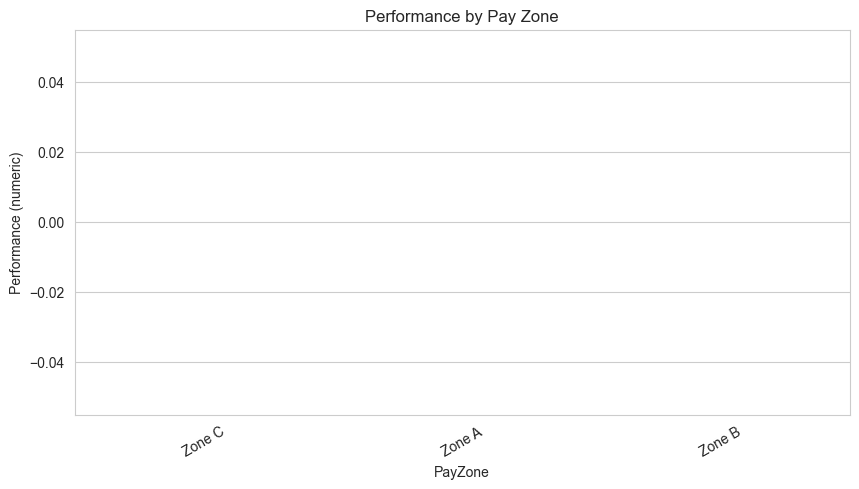

In [12]:
# Cell 8 - performance & payzone
if cols['perf']:
    # numericify performance if needed
    df['perf_numeric'] = pd.to_numeric(df[cols['perf']], errors='coerce')

    # Correlation numeric variables
    print("Correlation (tenure_years vs performance):")
    display(df[['tenure_years','perf_numeric']].corr())

    if cols['payzone']:
        plt.figure(figsize=(10,5))
        try:
            # Use barplot instead of boxplot to avoid errors
            sns.barplot(x=cols['payzone'], y='perf_numeric', data=df, palette='viridis')
            plt.title('Performance by Pay Zone')
            plt.xticks(rotation=30)
            plt.ylabel('Performance (numeric)')
            plt.show()
        except Exception as e:
            print(f"Error plotting: {e}")
    else:
        print("No PayZone column found for payzone vs performance.")
else:
    print("No Performance column detected.")


,total,exits,exit_rate,avg_tenure
Supervisor,,,,
Zachary Nelson,1,1,100.0,1.03
Aaron Andrews,1,1,100.0,2.23
Aaron Cochran,1,1,100.0,3.40
Aaron Erickson,1,1,100.0,3.69
Whitney Roberts,1,1,100.0,0.48
William Brown,1,1,100.0,0.42
William Castillo,1,1,100.0,0.20
William Cooper,1,1,100.0,3.72
William Ellis,1,1,100.0,0.47


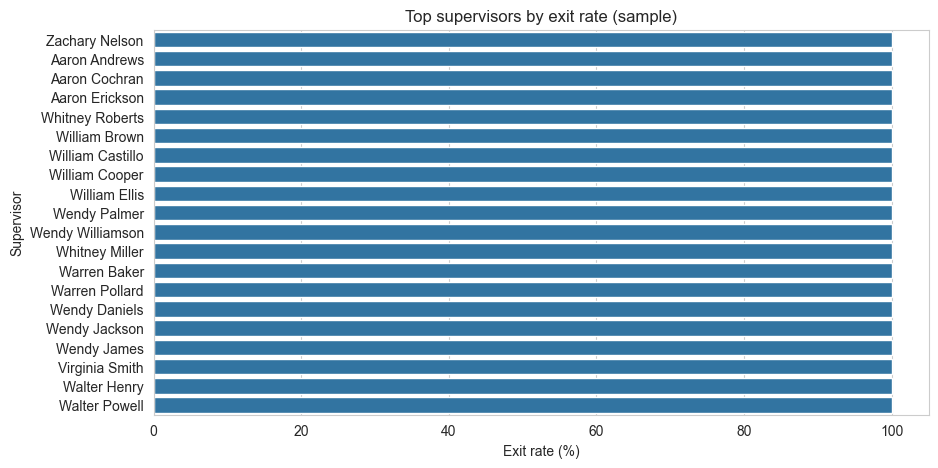

In [13]:
# Cell 9 - supervisor influence
if cols['supervisor']:
    sup = df.groupby(cols['supervisor']).agg(
        total=('exited','size'),
        exits=('exited','sum'),
        exit_rate=('exited', lambda x: x.sum()/x.size*100),
        avg_tenure=('tenure_years','mean')
    ).sort_values('exit_rate', ascending=False).head(20)
    display(sup)
    plt.figure(figsize=(10,5))
    sns.barplot(x='exit_rate', y=sup.index, data=sup.reset_index().rename(columns={'index':cols['supervisor']}))
    plt.xlabel('Exit rate (%)')
    plt.title('Top supervisors by exit rate (sample)')
    plt.show()
else:
    print("No Supervisor column detected.")


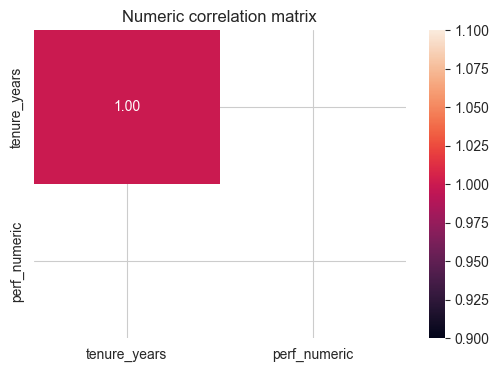

In [14]:
# Cell 10 - correlation heatmap
num_cols = []
for c in ['tenure_years','perf_numeric', cols['age'] if cols['age'] else None]:
    if c and c in df.columns:
        num_cols.append(c)
# try pay zone numeric (unlikely)
if cols['payzone'] and pd.api.types.is_numeric_dtype(df[cols['payzone']]):
    num_cols.append(cols['payzone'])

if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
    plt.title('Numeric correlation matrix')
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap. Found:", num_cols)


In [15]:
# Cell 11 - export useful summary tables to csv for reporting
summary_folder = "hr_analysis_outputs"
import os
os.makedirs(summary_folder, exist_ok=True)

# example saves
if cols['dept']:
    dept_turnover = df.groupby(cols['dept']).apply(turnover_rate).reset_index(name='turnover_pct')
    dept_turnover.to_csv(os.path.join(summary_folder, "dept_turnover.csv"), index=False)

if cols['supervisor']:
    sup.to_csv(os.path.join(summary_folder, "supervisor_turnover_sample.csv"))

print("Saved summary CSVs to", summary_folder)


Saved summary CSVs to hr_analysis_outputs


# Supervisor Turnover Analysis
## Do certain supervisors have higher employee turnover rates?
This section calculates the turnover rate for each supervisor and identifies those with the highest rates.

Top 10 Supervisors with highest turnover (min 5 employees):


,Supervisor,Total Employees,Exited Employees,Turnover Rate


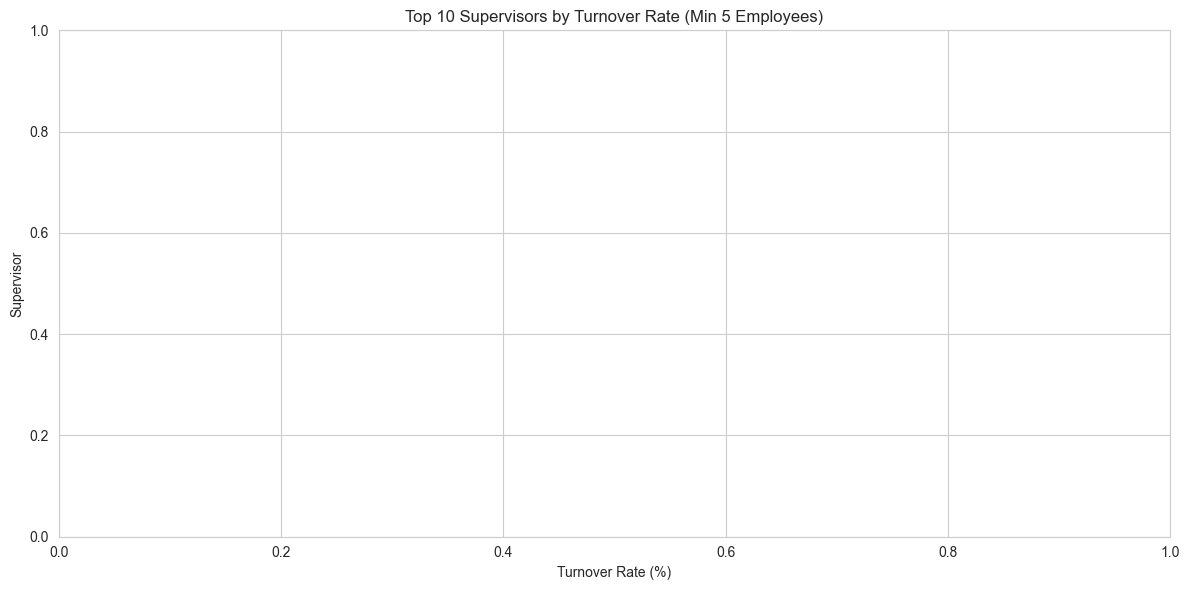

In [16]:
# Calculate turnover stats per supervisor
supervisor_col = cols.get('supervisor')

if supervisor_col and supervisor_col in df.columns:
    # Count total employees per supervisor
    sup_counts = df.groupby(supervisor_col).size().reset_index(name='Total Employees')
    
    # Count exited employees per supervisor
    sup_exits = df[df['exited'] == True].groupby(supervisor_col).size().reset_index(name='Exited Employees')
    
    # Merge and calculate rate
    sup_stats = pd.merge(sup_counts, sup_exits, on=supervisor_col, how='left')
    sup_stats['Exited Employees'] = sup_stats['Exited Employees'].fillna(0)
    sup_stats['Turnover Rate'] = (sup_stats['Exited Employees'] / sup_stats['Total Employees']) * 100
    
    # Filter for supervisors with a significant team size (e.g., > 5 employees) to avoid noise
    # You can adjust this threshold as needed
    min_team_size = 5
    sup_stats_filtered = sup_stats[sup_stats['Total Employees'] >= min_team_size].sort_values('Turnover Rate', ascending=False)
    
    print(f"Top 10 Supervisors with highest turnover (min {min_team_size} employees):")
    display(sup_stats_filtered.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Turnover Rate', y=supervisor_col, data=sup_stats_filtered.head(10), palette='viridis')
    plt.title(f'Top 10 Supervisors by Turnover Rate (Min {min_team_size} Employees)')
    plt.xlabel('Turnover Rate (%)')
    plt.ylabel('Supervisor')
    plt.tight_layout()
    plt.show()
else:
    print("Supervisor column not found in dataset.")

# Performance vs. Tenure Analysis
## Do employees with higher performance scores have longer tenures?
This section investigates the correlation between employee performance scores and their length of service.

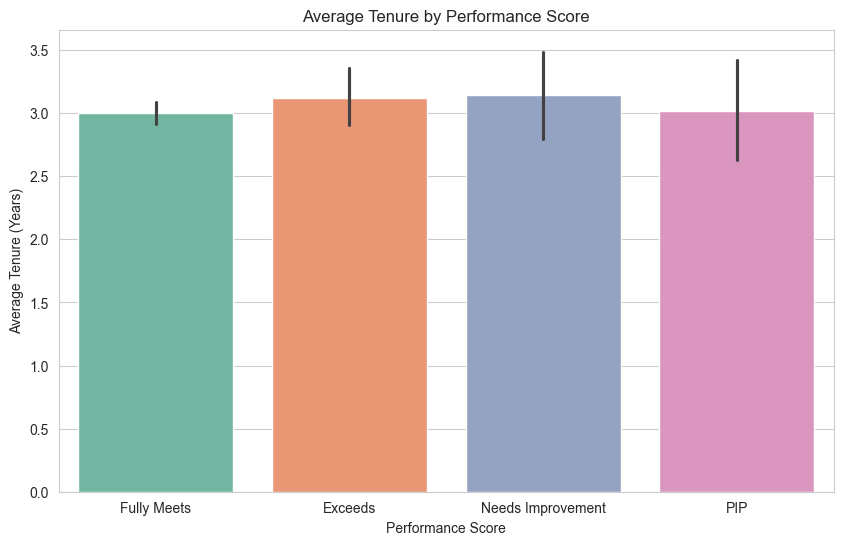

In [17]:
# Analyze Performance vs Tenure
perf_col = cols.get('perf')

if perf_col and perf_col in df.columns:
    if 'tenure_years' in df.columns:
        # Visualization: Bar Plot (instead of boxplot)
        plt.figure(figsize=(10, 6))
        try:
            sns.barplot(x=perf_col, y='tenure_years', data=df, palette='Set2')
            plt.title('Average Tenure by Performance Score')
            plt.xlabel('Performance Score')
            plt.ylabel('Average Tenure (Years)')
            plt.show()
        except Exception as e:
            print(f"Error plotting: {e}")
        
        # Visualization: Scatter Plot
        if pd.api.types.is_numeric_dtype(df[perf_col]):
            plt.figure(figsize=(10, 6))
            try:
                sns.scatterplot(x=perf_col, y='tenure_years', data=df, alpha=0.6)
                plt.title('Tenure vs. Performance Score')
                plt.show()
                
                corr = df[[perf_col, 'tenure_years']].corr().iloc[0, 1]
                print(f"Correlation: {corr:.2f}")
            except Exception as e:
                print(f"Error plotting scatter: {e}")
    else:
        print("Tenure column missing.")
else:
    print("Performance column not found.")


# Departmental Turnover Deep Dive
## Which departments have the highest employee attrition rates?
This section visualizes the turnover rate across different departments to identify high-risk areas.

Turnover Rate by Department:


DepartmentType
Executive Office        79.166667
Admin Offices           60.000000
Software Engineering    55.652174
IT/IS                   52.093023
Production              50.198020
Sales                   49.546828
dtype: float64

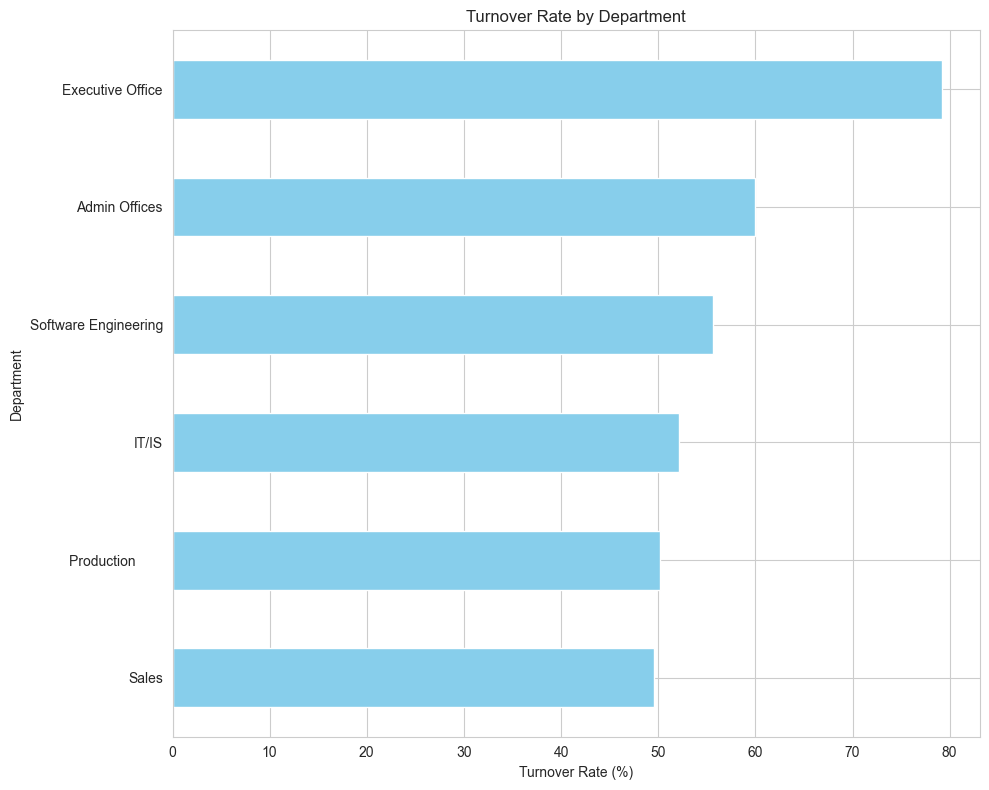

In [18]:
# Calculate and Visualize Turnover by Department
dept_col = cols.get('dept')

if dept_col and dept_col in df.columns:
    # Calculate turnover rates (re-using logic or creating fresh)
    dept_turnover = df.groupby(dept_col).apply(lambda x: (x['exited'].sum() / len(x)) * 100).sort_values(ascending=False)
    
    print("Turnover Rate by Department:")
    display(dept_turnover)
    
    # Visualization: Horizontal Bar Chart
    plt.figure(figsize=(10, 8))
    dept_turnover.plot(kind='barh', color='skyblue')
    plt.title('Turnover Rate by Department')
    plt.xlabel('Turnover Rate (%)')
    plt.ylabel('Department')
    plt.gca().invert_yaxis()  # Highest turnover at top
    plt.tight_layout()
    plt.show()
else:
    print("Department column not found in dataset.")

# Code Refactoring: Reusable Visualization Function
## Standardizing Turnover Analysis
This section introduces a reusable function to plot turnover rates by any categorical variable, ensuring consistency and reducing code duplication.

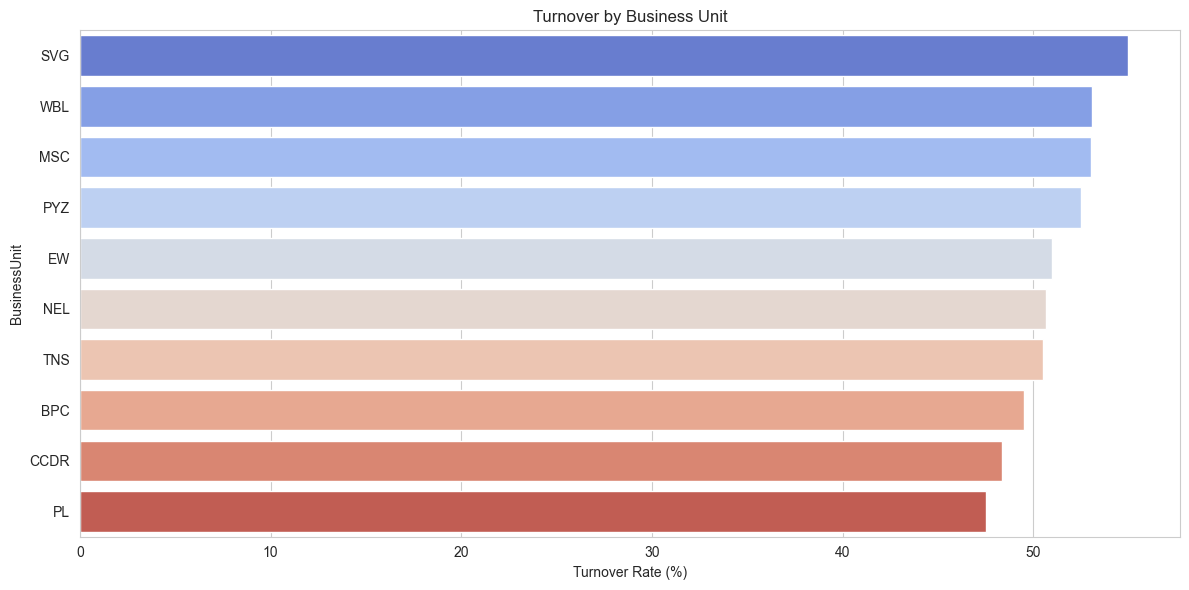

In [19]:
def plot_turnover_by_category(df, category_col, title=None, min_count=0):
    """
    Plots turnover rate by a given categorical column.
    
    Args:
        df (pd.DataFrame): The dataframe containing employee data.
        category_col (str): The column name to group by.
        title (str, optional): Custom title for the plot.
        min_count (int): Minimum number of employees required in a category to be included.
    """
    if category_col not in df.columns:
        print(f"Column '{category_col}' not found.")
        return

    # Calculate stats
    stats = df.groupby(category_col).agg(
        total=('exited', 'size'),
        exited=('exited', 'sum')
    ).reset_index()
    
    # Filter by minimum count
    stats = stats[stats['total'] >= min_count]
    
    # Calculate rate
    stats['turnover_rate'] = (stats['exited'] / stats['total']) * 100
    stats = stats.sort_values('turnover_rate', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, max(6, len(stats) * 0.3)))  # Dynamic height
    sns.barplot(x='turnover_rate', y=category_col, data=stats, palette='coolwarm')
    
    plot_title = title if title else f'Turnover Rate by {category_col}'
    plt.title(plot_title)
    plt.xlabel('Turnover Rate (%)')
    plt.ylabel(category_col)
    plt.tight_layout()
    plt.show()

# Example usage with Business Unit
biz_unit_col = cols.get('biz_unit')
if biz_unit_col:
    plot_turnover_by_category(df, biz_unit_col, title='Turnover by Business Unit')